## This notebook shows an application of kneed in selecting the optimal number of clusters from kmeans clustering algorithm.

In [1]:
%matplotlib inline

## Look at the K means tutorial posted [here](https://pythonprogramminglanguage.com/kmeans-elbow-method/)

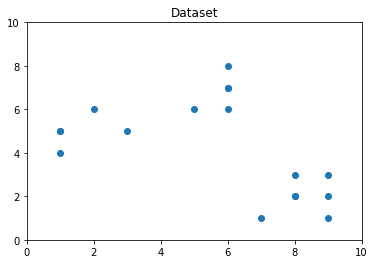

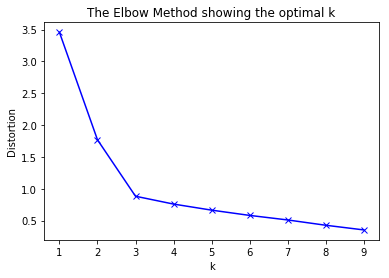

In [2]:
# clustering dataset
# determine k using elbow method
 
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
 
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()
 
# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
 
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## focus on the second plot showing the distortion as a function of k clusters

In [3]:
print(K, '\n', distortions)

range(1, 10) 
 [3.4577032384495707, 1.7687413573405673, 0.8819889697423957, 0.7587138847606585, 0.6635212812400347, 0.5808803063754726, 0.5093717077076824, 0.42618267462691206, 0.3529411764705882]


## Use kneed to determine best k

In [4]:
import sys
sys.path.append('..')

from kneed import KneeLocator

In [5]:
kn = KneeLocator(list(K), distortions, S=1.0, curve='convex', direction='decreasing')

In [6]:
kn.knee

3

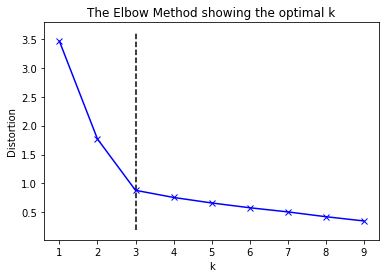

In [7]:
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.plot(K, distortions, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
